# Churn Analytics

### Problem Statement:

This industry has a unique set of challenges from the technology front and the
customer demands due to its wide range of sectors. Telecom industry consists of a set
of sectors like wireless communication, satellite communication, Internet Service
Provider etc.The primary objective is on the churn in telecom industries to accurately estimate the
customer survival and customer hazard functions to gain the complete knowledge of
churn over the customer tenure.

Churn Model helps identifying customers who are most likely to switch to different
eCommerce website. Once identified the companies can take actions in order to keep its
existing customers. Now the question is, how does Churn model identify these
customers? The model can be used to calculate the churn rate and depending on the
nature of business, different metrics can be used.

#### Import Data And Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Data Cleaning

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0, 'Young')
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1, 'Senior')

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Young,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Young,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,Young,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Young,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Young,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Young,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,Young,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,Young,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Senior,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.TotalCharges.dtypes

dtype('O')

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['tenure_Group'] = '61-75'
df.loc[(df['tenure']>= 1) & (df['tenure']<= 15) ,'tenure_Group' ] = '1-15'
df.loc[(df['tenure']>= 16) & (df['tenure']<= 30) ,'tenure_Group' ] = '16-30'
df.loc[(df['tenure']>= 31) & (df['tenure']<= 45) ,'tenure_Group' ] = '31-45'
df.loc[(df['tenure']>= 46) & (df['tenure']<= 60) ,'tenure_Group' ] = '46-60'
df.tenure_Group.value_counts()

1-15     2459
61-75    1418
16-30    1171
46-60    1038
31-45     957
Name: tenure_Group, dtype: int64

#### Numeric and Categorical Features

In [12]:
numeric_feature = [i for i in df.columns if df[i].dtype != 'object']
category_feature = [i for i in df.columns if df[i].dtype == 'object']

print('We have {} numeric features: {}'.format(len(numeric_feature), numeric_feature))
print('We have {} category features: {}'.format(len(category_feature), category_feature))


We have 2 numeric features: ['tenure', 'MonthlyCharges']
We have 20 category features: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'tenure_Group']


In [30]:
Churned_Customers = df.Churn[df['Churn'] == 'Yes'].value_counts()

In [53]:
Percentage_of_Churned = (Churned_Customers/df['customerID'].count())*100

print('We have {} Churned Customers and there percentage is: {}' .format(Churned_Customers,Percentage_of_Churned))

We have Yes    1869
Name: Churn, dtype: int64 Churned Customers and there percentage is: Yes    26.536987
Name: Churn, dtype: float64


### Data Visualization

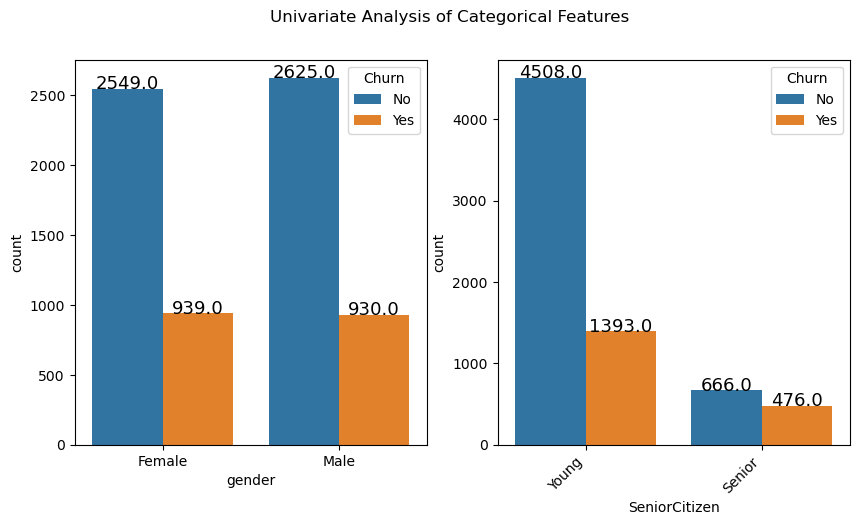

In [35]:
plt.figure(figsize=(10,5))
plt.suptitle('Univariate Analysis of Categorical Features')

l=['gender', 'SeniorCitizen']

for i,category in enumerate(l):
    plt.subplot(1,2,i+1)
    ax= sns.countplot(data= df, x= df[category], hue= df['Churn'])
    for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 13)

plt.xlabel(l[i])
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout
plt.show()    
    
    
    

In [ ]:
l=['gender', 'SeniorCitizen', 'PhoneService' 'Partner', 'Churn', 'tenure_Group','Contract', 'PaperlessBilling', 'PaymentMethod']


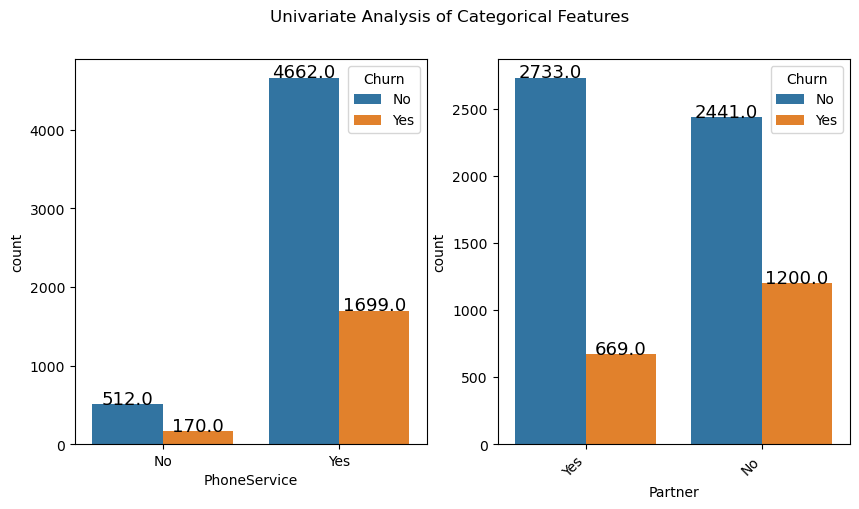

In [50]:
plt.figure(figsize=(10,5))
plt.suptitle('Univariate Analysis of Categorical Features')

l=['PhoneService', 'Partner']

for i,category in enumerate(l):
    plt.subplot(1,2,i+1)
    ax=sns.countplot(data= df, x= df[category], hue= df['Churn'])
    for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 13)

plt.xlabel(l[i])
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout
plt.show()



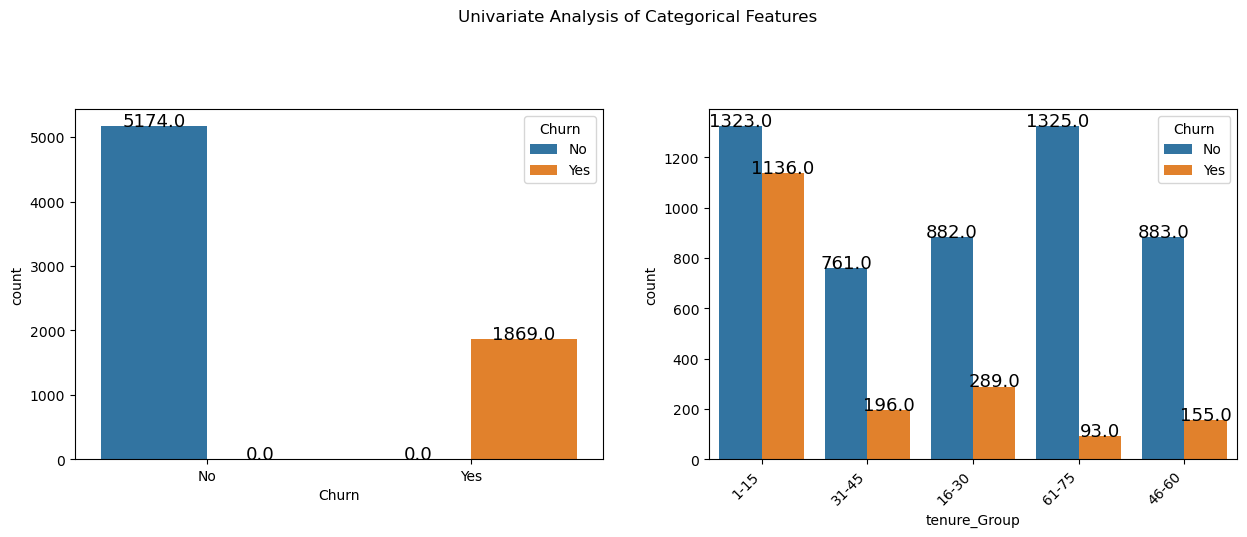

In [46]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Features')

l= ['Churn', 'tenure_Group']

for i,category in enumerate(l):
    plt.subplot(2,2,i+1)
    ax= sns.countplot(data= df, x= df[category], hue= df['Churn'])
    for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 13)

plt.xlabel(l[i])
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout
plt.show()    
    
    
    

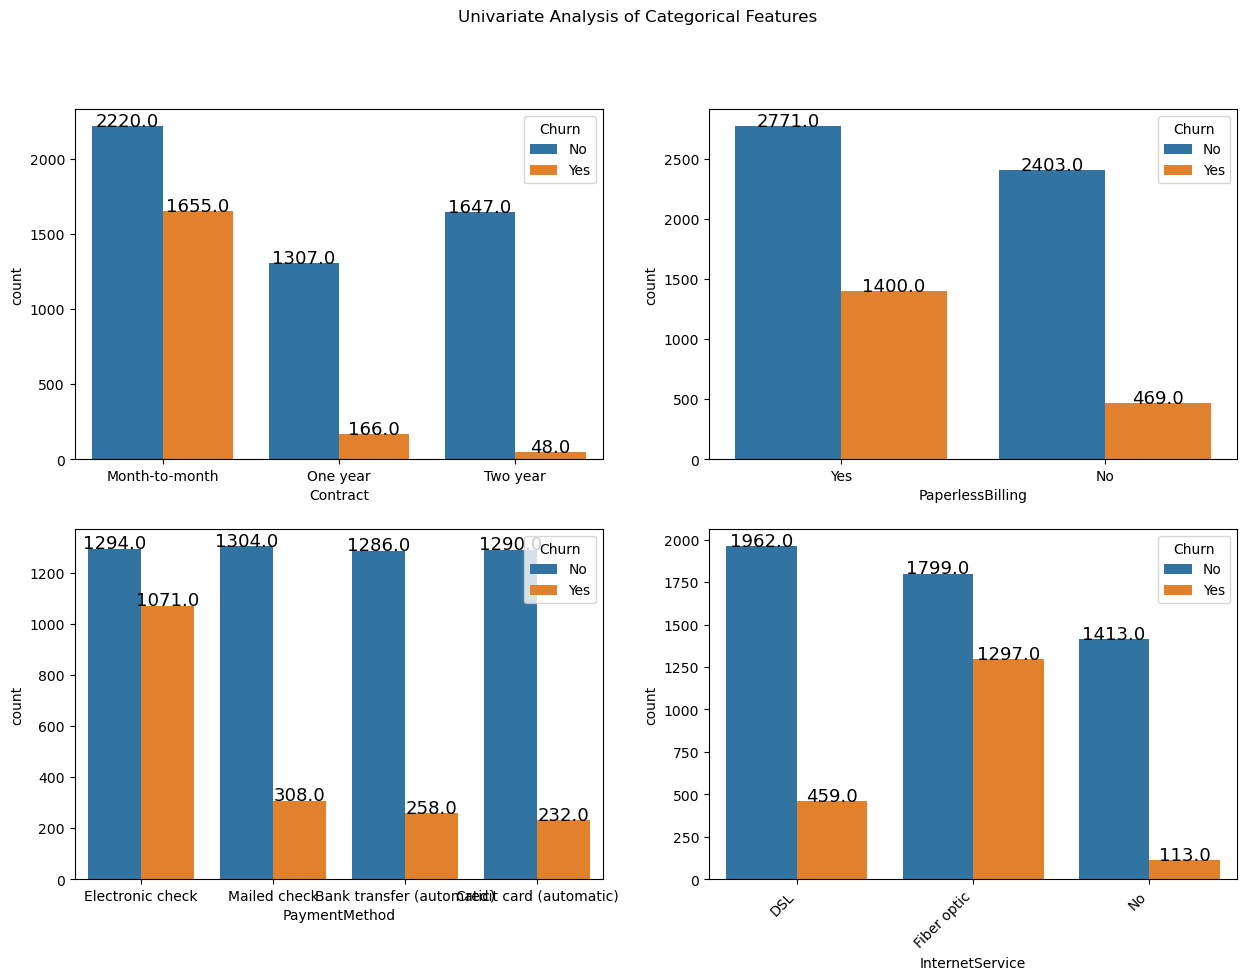

In [51]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Features')

l=['Contract', 'PaperlessBilling', 'PaymentMethod','InternetService']

for i,category in enumerate(l):
    plt.subplot(2,2,i+1)
    ax= sns.countplot(data= df, x= df[category], hue= df['Churn'])
    for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 13)

plt.xlabel(l[i])
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout
plt.show()    
    
    
    

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

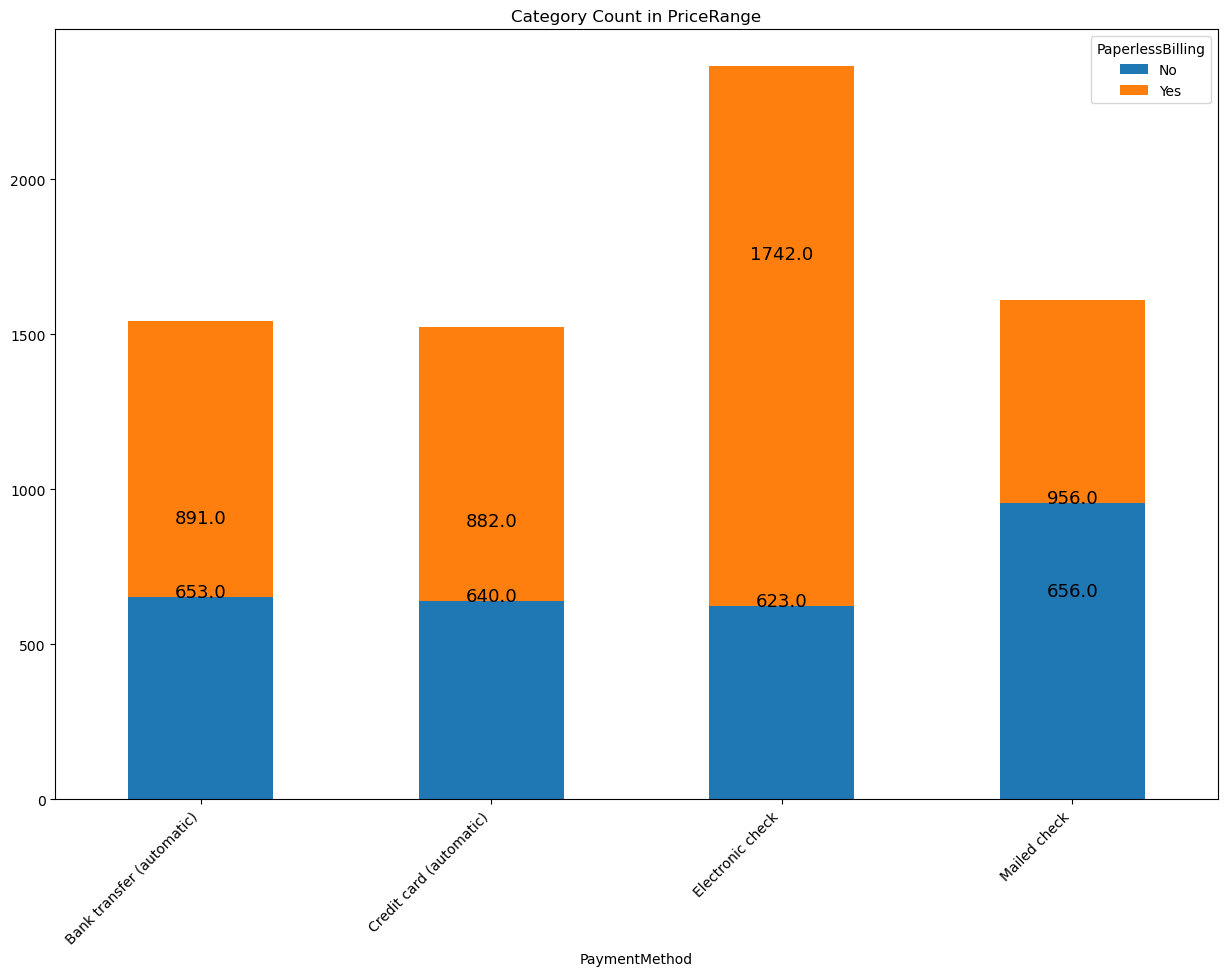

In [56]:
x = pd.crosstab(df['PaymentMethod'], df['PaperlessBilling'])
ax=x.plot(kind = 'bar', stacked = True, figsize=(15,10))
for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 13)

plt.title("Category Count in PriceRange")
plt.xticks(rotation = 45, ha = 'right' )

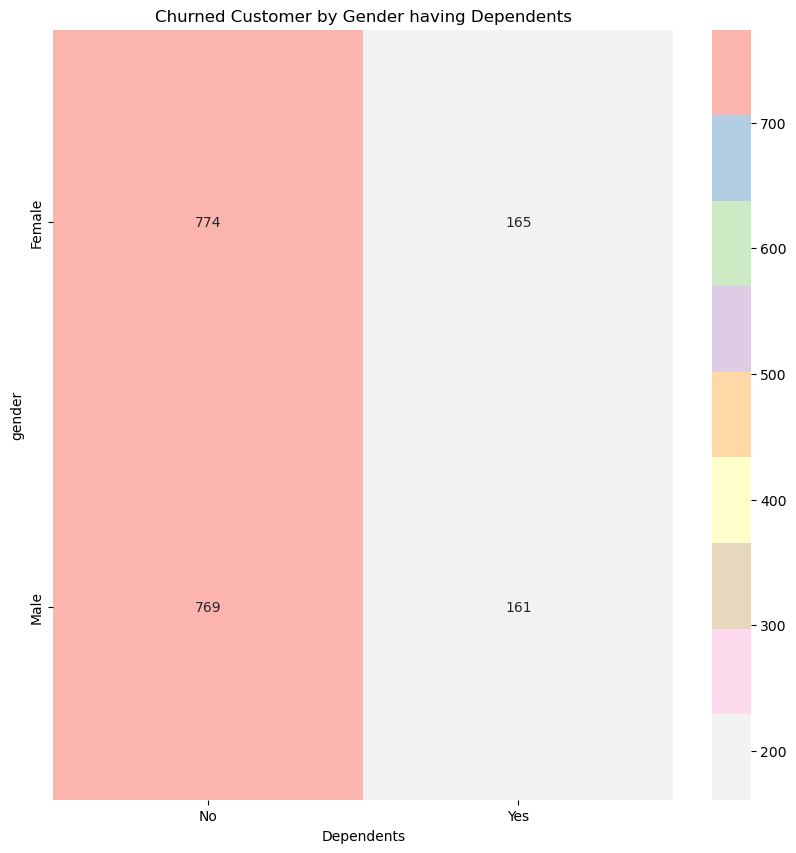

In [63]:
df1 =df[df['Churn']== 'Yes']
plt.figure(figsize=(10,10))
plt.title('Churned Customer by Gender having Dependents')
sns.heatmap(pd.crosstab(df1['gender'], df1['Dependents']), annot= True ,fmt= 'g', cmap= "Pastel1_r",)
plt.show()

#### Overview:-
##### - There are total 7,043 customers subscribed to the client, out of which 3,555 are Males & 3,488 are Females, & the revenue earned is 16.1M.
##### - 84% of our customers are Young i.e. 5901.
##### - By tenure, 31% customers are subscribed to below 12 months, as a result there are more customers with month-to-month contract.
##### - Most customers have Fiber optic internet for which they are paying high charges.
##### - 73.5% of customers have been retained i.e. 5,174.
##### - 1,869 customers have churned i.e. 26.5% , out of which 380 customers churned last month itself